In [ ]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import utils
from google.colab.patches import cv2_imshow

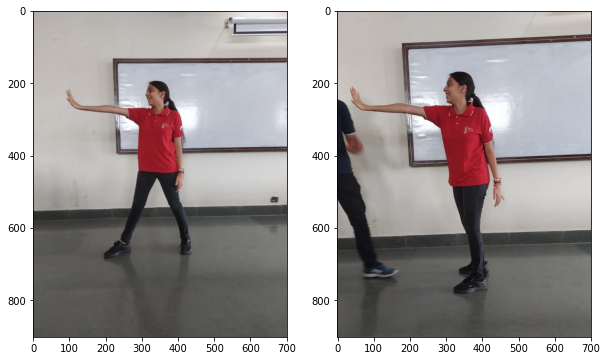

In [ ]:
frame1 = cv.imread("/content/riya1.jpeg") # input
frame2 = cv.imread("/content/riya2.jpeg") # test

# Ensure images are the same size
hi = min(frame1.shape[0], frame2.shape[0])
wi = min(frame1.shape[1], frame2.shape[1])
frame1 = cv.resize(frame1, (wi,hi))
frame2 = cv.resize(frame2, (wi,hi))

# Visualize images
fig = plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(frame1[:,:,::-1])
plt.subplot(122)
plt.imshow(frame2[:,:,::-1])

# New section

# New section

In [ ]:
frameWidth = frame1.shape[1]
frameHeight = frame1.shape[0]

In [ ]:
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
               "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
               ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
               ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]

In [ ]:
# A default value set 
inWidth = 300
inHeight = 300

In [ ]:
net = cv.dnn.readNetFromCaffe("/content/protxt.crdownload", "/content/drive/MyDrive/pose_iter_160000.caffemodel")
inp = cv.dnn.blobFromImage(frame1, (1.0 / 255), (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
net.setInput(inp)
out = net.forward()

error: ignored

In [ ]:
print (out.shape)

(1, 44, 38, 38)


In [ ]:
pose1 = []
conf1 = []
for i in range(len(BODY_PARTS)):

    heatMap = out[0, i, :, :]
    _, conf, _, point = cv.minMaxLoc(heatMap)
    
    x = (frameWidth * point[0]) / out.shape[3]
    y = (frameHeight * point[1]) / out.shape[2]

    # Add a point if it's confidence is higher than threshold set to 0.1.
    pose1.append((int(x), int(y)) if conf > 0.1 else None)
    conf1.append(conf)

In [ ]:
print (pd.DataFrame(pose1, columns=['x','y']))

      x    y
0   410  212
1   410  334
2   365  334
3   273  334
4   159  334
5   479  365
6   479  456
7   479  547
8   387  517
9   342  669
10  296  790
11  456  517
12  479  669
13  501  790
14  410  425
15  433  821


In [ ]:
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if pose1[idFrom] and pose1[idTo]:
        cv.line(frame1, pose1[idFrom], pose1[idTo], (255, 74, 0), 3)
        cv.ellipse(frame1, pose1[idFrom], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.ellipse(frame1, pose1[idTo], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.putText(frame1, str(idFrom), pose1[idFrom], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)
        cv.putText(frame1, str(idTo), pose1[idTo], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)

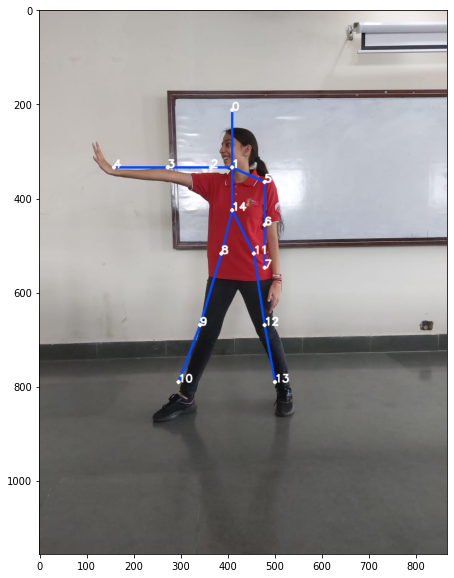

In [ ]:
fig1 = plt.figure(figsize = (12,10))
plt.imshow(frame1[:,:,::-1])

In [ ]:
inp = cv.dnn.blobFromImage(frame2, (1.0 / 255), (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
net.setInput(inp)
out = net.forward()

In [ ]:
pose2 = []
for i in range(len(BODY_PARTS)):

    heatMap = out[0, i, :, :]
    _, conf, _, point = cv.minMaxLoc(heatMap)
    
    x = (frameWidth * point[0]) / out.shape[3]
    y = (frameHeight * point[1]) / out.shape[2]

    pose2.append((int(x), int(y)) if conf > 0.1 else None)

In [ ]:
print (pd.DataFrame(pose2, columns=['x','y']))

      x    y
0   410  152
1   433  304
2   365  304
3   250  334
4   136  395
5   501  334
6   547  456
7   114  304
8   456  578
9   501  730
10  524  882
11  365  578
12  342  730
13  296  882
14  410  456
15  228  943


In [ ]:
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if pose2[idFrom] and pose2[idTo]:
        cv.line(frame2, pose2[idFrom], pose2[idTo], (255, 74, 0), 3)
        cv.ellipse(frame2, pose2[idFrom], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.ellipse(frame2, pose2[idTo], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.putText(frame2, str(idFrom), pose2[idFrom], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)
        cv.putText(frame2, str(idTo), pose2[idTo], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)

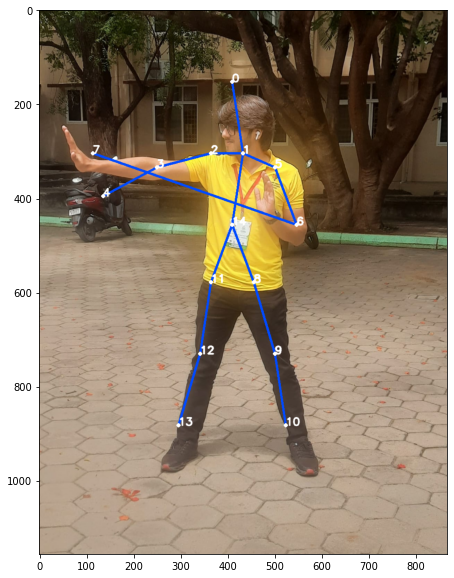

In [ ]:
fig2 = plt.figure(figsize = (10,10))
plt.imshow(frame2[:,:,::-1])

In [ ]:
Xdiff=[]
for i in range (16):
    Xdiff.append(pose1[i][0]-pose2[i][0])

In [ ]:
Ydiff=[]
for i in range (16):
    Ydiff.append(pose1[i][1]-pose2[i][1])

In [ ]:
print(Xdiff)
print(Ydiff)

[0, -23, 0, 23, 23, -22, -68, 365, -69, -159, -228, 91, 137, 205, 0, 205]
[60, 30, 30, 0, -61, 31, 0, 243, -61, -61, -92, -61, -61, -92, -31, -122]


In [ ]:
# define ndarray a
a = np.array(Xdiff) 
np.mean(a, axis=None)

30.0

In [ ]:
# define ndarray a
a = np.array(Ydiff) 
np.mean(a, axis=None)

-15.5

In [ ]:
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)

    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if pose2[idFrom] and pose2[idTo]:
        cv.line(frame2, pose2[idFrom], pose2[idTo], (255, 74, 0), 3)
        cv.ellipse(frame2, pose2[idFrom], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.ellipse(frame2, pose2[idTo], (4, 4), 0, 0, 360, (255, 255, 255), cv.FILLED)
        cv.putText(frame2, str(idFrom), pose2[idFrom], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)
        cv.putText(frame2, str(idTo), pose2[idTo], cv.FONT_HERSHEY_SIMPLEX, 0.75, (255, 255, 255),2,cv.LINE_AA)

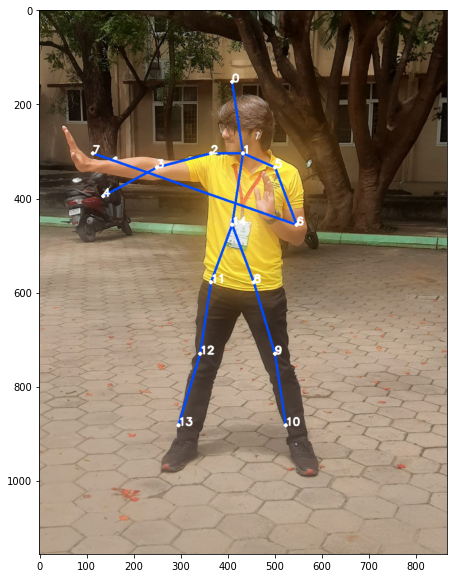

In [ ]:
fig2 = plt.figure(figsize = (10,10))
plt.imshow(frame2[:,:,::-1])

In [ ]:
def similarity_score(pose1, pose2):
    p1 = []
    p2 = []
    pose_1 = np.array(pose1,dtype=float)
    pose_2 = np.array(pose2, dtype=float)

    # Normalize coordinates
    pose_1[:,0] = pose_1[:,0] / max(pose_1[:,0])
    pose_1[:,1] = pose_1[:,1] / max(pose_1[:,1])
    pose_2[:,0] = pose_2[:,0] / max(pose_2[:,0])
    pose_2[:,1] = pose_2[:,1] / max(pose_2[:,1])

    # L2 Normalization
#     for joint in range(pose_1.shape[0]):
#         mag1 = float(math.sqrt(pose_1[joint][0]**2 + pose_1[joint][1]**2))
#         mag2 = float(math.sqrt(pose_2[joint][0]**2 + pose_2[joint][1]**2))

#         pose_1[joint][0] = pose_1[joint][0] / mag1
#         pose_1[joint][1] = pose_1[joint][1] / mag2
#         pose_2[joint][0] = pose_2[joint][0] / mag2
#         pose_2[joint][1] = pose_2[joint][1] / mag2

    # Turn (16x2) into (32x1)
    for joint in range(pose_1.shape[0]):
        x1 = pose_1[joint][0]
        y1 = pose_1[joint][1]
        x2 = pose_2[joint][0]
        y2 = pose_2[joint][1]

        p1.append(x1)
        p1.append(y1)
        p2.append(x2)
        p2.append(y2)

    p1 = np.array(p1)
    p2 = np.array(p2)

    # Looking to minimize the distance if there is a match
    # Computing two different distance metrics
    scoreA = utils.cosine_distance(p1, p2)
    scoreB = utils.weight_distance(p1, p2, conf1)
    accuracy=100-scoreA*100;
    print("Cosine Distance:", scoreA)
    print("Weighted Distance:", scoreB)
    print("Accuracy:", accuracy)


In [ ]:
similarity_score(pose1, pose2)

Cosine Distance: 0.042582585054717126
Weighted Distance: 0.2839732075843837
Accuracy: 95.74174149452828


In [ ]:
def visualize_output(pose1, pose2, size):
    
    # Initialize blank canvas
    canvas = np.ones(size)

    # Plot points on images
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        if pose1[idFrom] and pose1[idTo]:
            cv.line(canvas, pose1[idFrom], pose1[idTo], (0, 255, 0), 3)
            cv.ellipse(canvas, pose1[idFrom], (4, 4), 0, 0, 360, (0, 255, 0), cv.FILLED)
            cv.ellipse(canvas, pose1[idTo], (4, 4), 0, 0, 360, (0, 255, 0), cv.FILLED)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        if pose2[idFrom] and pose2[idTo]:
            cv.line(canvas, pose2[idFrom], pose2[idTo], (255, 0, 0), 3)
            cv.ellipse(canvas, pose2[idFrom], (4, 4), 0, 0, 360, (255, 0, 0), cv.FILLED)
            cv.ellipse(canvas, pose2[idTo], (4, 4), 0, 0, 360, (255, 0, 0), cv.FILLED)

    # Visualize images
    fig3 = plt.figure(figsize = (10,10))
    plt.imshow(canvas[:,:,::-1])
    plt.grid(True)

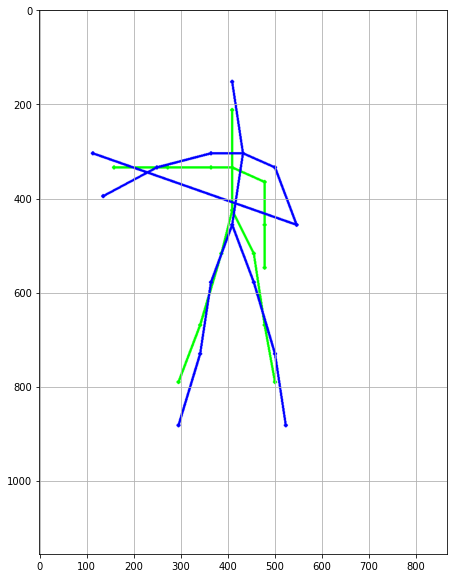

In [ ]:
visualize_output(pose1, pose2, frame1.shape)

In [ ]:
q = np.array([[pose1[1][0]],[pose1[1][1]],[pose1[14][0]],[pose1[14][1]]], np.float)

p = np.array([[pose2[1][0], pose2[1][1], 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, pose2[1][0], pose2[1][1], 1.0], \
              [pose2[14][0], pose2[14][1], 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, pose2[14][0], pose2[14][1], 1.0]], np.float)

A, res, rank, s = np.linalg.lstsq(p, q)

T = np.array([[A[0], A[1], A[2]],[A[3], A[4], A[5]],[0.0, 0.0, 1.0]], np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureW

In [ ]:
pose2_new = []

for (i,j) in pose2:
        
        cur_pt = np.array([i,j,1])
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        pose2_new.append((int(transformed_pt[0]), int(transformed_pt[1])))

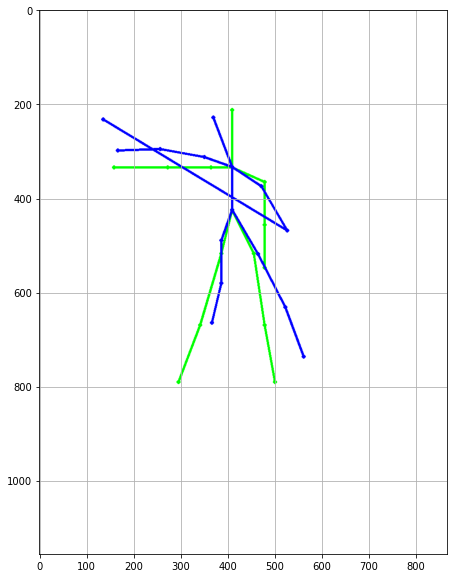

In [ ]:
visualize_output(pose1, pose2_new, frame1.shape)

In [ ]:
pose1_new = np.array(pose1)
pose2_new = np.array(pose2)

pose1_new[:,0] = pose1_new[:,0] - min(pose1_new[:,0])
pose1_new[:,1] = pose1_new[:,1] - min(pose1_new[:,1])

pose2_new[:,0] = pose2_new[:,0] - min(pose2_new[:,0])
pose2_new[:,1] = pose2_new[:,1] - min(pose2_new[:,1])

In [ ]:
resize_x = max(pose2_new[:,0])/max(pose1_new[:,0])
resize_y = max(pose2_new[:,1])/max(pose1_new[:,1])

pose1_new[:,0] = pose1_new[:,0] * resize_x
pose1_new[:,1] = pose1_new[:,1] * resize_y

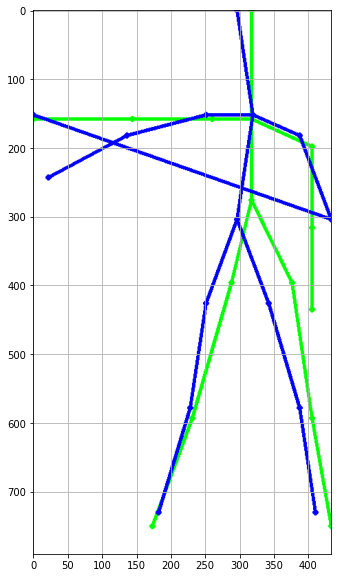

In [ ]:
pose1_resized = tuple(map(tuple, pose1_new))
pose2_resized = tuple(map(tuple, pose2_new))

# Get dimensions of output window
pose_1 = np.array(pose1_new)
pose_2 = np.array(pose2_new)
max_y = max(max(pose_1[:,0]), max(pose_2[:,0]))
max_x = max(max(pose_1[:,1]), max(pose_2[:,1]))
dim = (max_x, max_y, 3) 
visualize_output(pose1_resized, pose2_resized, dim)

In [ ]:
print(pose1_new)
print(pose2_new)

print('call')
meanDiff=np.mean(pose1_new, axis=None)-np.mean(pose2_new, axis=None)
if(meanDiff>0):
     
    print(meanDiff)
    meanDiff=np.mean(pose2_new,axis=None)/np.mean(pose1_new, axis=None)
else:
    meanDiff = -meanDiff;
    meanDiff=np.mean(pose1_new, axis=None)/np.mean(pose2_new,axis=None)
    print(meanDiff)


print(meanDiff*100)
a=np.array(pose1_new)
b=np.array(pose2_new)
a=a.flatten()
b=b.flatten()
  # predicted labels

[[317   0]
 [317 158]
 [260 158]
 [144 158]
 [  0 158]
 [405 198]
 [405 316]
 [405 435]
 [288 396]
 [231 593]
 [173 750]
 [376 396]
 [405 593]
 [433 750]
 [317 276]
 [346 791]]
[[296   0]
 [319 152]
 [251 152]
 [136 182]
 [ 22 243]
 [387 182]
 [433 304]
 [  0 152]
 [342 426]
 [387 578]
 [410 730]
 [251 426]
 [228 578]
 [182 730]
 [296 304]
 [114 791]]
call
30.125
91.19473876507125
